## PENDULUM EXERCISE -- Teresa Puyol López

In [9]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit


### Reading the data and saving it

In [10]:
path = "\\Users\\Teresa\\Desktop\\COMPU\\FISICA_COMPUTACIONAL\\Fisica_Computacional\\pendulo"
data = np.load(path + '\\datos.npy')
#print(np.shape(data))

# We make 2 vectors, one with the different lenghts and the other with the respective errors
l=data[:, 0].copy()
l_err=data[:, 1].copy()

# We make a matrix with the times for 10 oscillations, each row is a different oscillation lenght 
time=np.zeros((11,10))
for i in range(0,11):
   for j in range(2,12):
      time[i,j-2]=data[i,j]
      j+=1
   i=i+1


# We check that everything is stored correclty
#print(time)
#print(data) 
#print(l)

### We make a function that calculates the average time and the error.

In [11]:
# We make the average of the times from a vector of times, and the error will be the U_a: standard deviation 
# of the times divided by the square root of the number of times.

def average_time(t, n):
    """It calculates the average of a vector t of n components

    Args:
        t (array): vector of n components
        n (int): dimension of the vector

    Returns:
        float: average of the vector t
    """

    average = 0
    desvest = 0
    for i in range(0, n):
        average += t[i]
    
    desvest = np.std(t)/np.sqrt(10)
    result = [average / n, desvest]
    return result


print(average_time(time[0, :], 10)[0], average_time(time[0, :], 10)[1])


20.062907369751297 0.008158267229214053


### We plot the period as a function of its length

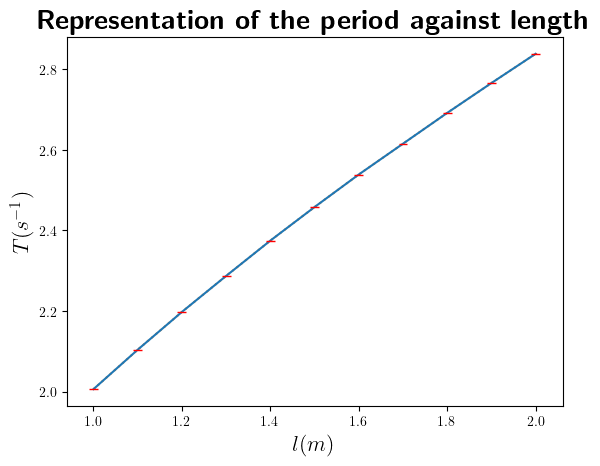

In [12]:
# To do this, we need to get the period for each length and its error in two separate vectors (for simplicity)

p=np.zeros(11)
p_err=np.zeros(11)
for i in range(0,11):
    for j in range(0,10):
    
        p[i]=average_time(time[i,:],10)[0]/10
        p_err[i]=average_time(time[i,:],10)[1]/10
        j +=1
    i + 1

# Now we plot the period 

plt.rcParams['text.usetex'] = True  

plt.plot(l,p, label = r'period')
plt.xlabel(r'$l (m)$', fontsize = 16)           
plt.ylabel(r'$T (s^{-1})$', fontsize = 16)                             
plt.title(r'\textbf{Representation of the period against length}', fontsize = 20)

# Now we make the error bars
x_err=l_err
y_err=p_err
plt.errorbar(l, p, xerr = x_err, yerr = y_err, ecolor= 'r', elinewidth = 1, 
            barsabove=True, linestyle = 'dotted')

plt.show()

### Now we make a mean square fit to the data to get the value of g with its error.

The value for g = 9.8056169153498 ± 0.0013907897975155988 m/s^2


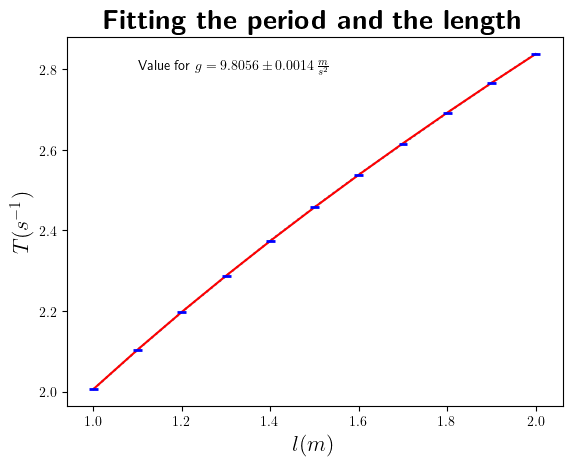

In [13]:
# We make the function to which we will fit the data and we fit it using the function curve_fit
def funcion(x, m):
    return 2*np.pi*np.sqrt(x/m)



popt, pcov = curve_fit(funcion, l, p, sigma=p_err)


# We take out the fitted value for g
g = popt[0]
g_err = np.sqrt(pcov[0,0]) # Even if I only have one element in those arrays, it's good to take the values like this so that they are floats
print(rf'The value for g = {g} ± {g_err} m/s^2')


# Plotting the values and the fitted function and the errors
#plt.scatter(l, p, label='Experimental data')
plt.plot(l, funcion(l, g), color='red')

x_err=l_err
y_err=p_err


plt.errorbar(l, p, xerr = x_err, yerr = y_err, ecolor= 'b', elinewidth = 2, 
            barsabove=True, linestyle = 'dotted')

plt.xlabel(r'$l (m)$', fontsize = 16)           
plt.ylabel(r'$T (s^{-1})$', fontsize = 16)                             
plt.title(r'\textbf{Fitting the period and the length}', fontsize = 20)
plt.text(1.1, 2.8, rf'Value for $g = {g:.4f} \pm {g_err:.4f} \, \frac{{m}}{{s^2}}$', fontsize=10, color='black')

plt.show()